## House Price Predictor

In [1]:
import pandas as pd

In [2]:
housing_data=pd.read_csv('Boston_Housing.csv')

In [3]:
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing_data['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284273,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.700575,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.619000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F3FAAB5B88>,
      dtype=object)

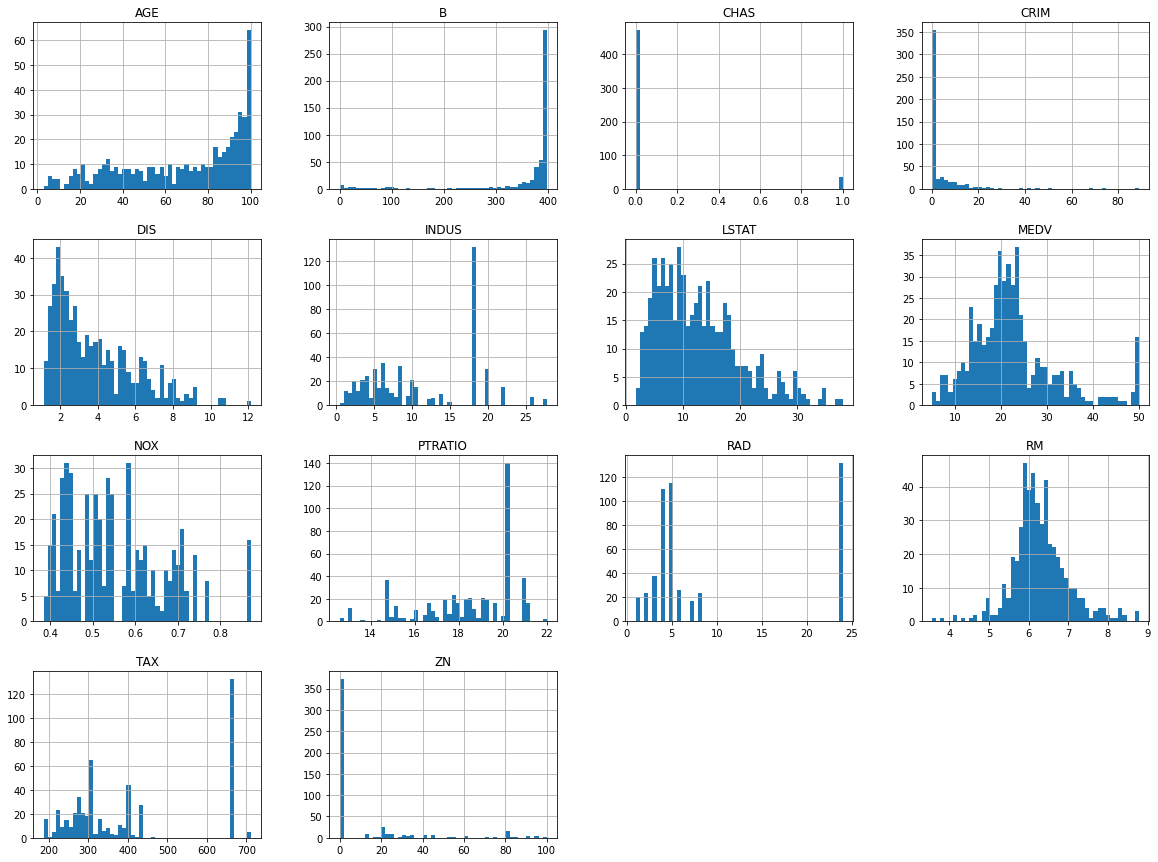

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing_data.hist(bins=50, figsize=(20,15))

### Train-Test Splitting

In [8]:
#For learning purposes
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffle=np.random.permutation(len(data))
    print(shuffle)
    test_set_size=int(len(data) * test_ratio)
    test_indices=shuffle[:test_set_size]
    train_indices=shuffle[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
#train_set,test_set= split_train_test(housing_data,test_size=0.2, random_state=42)

In [10]:
#print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

In [11]:
from sklearn.model_selection import train_test_split
train_set,test_set= train_test_split(housing_data,test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 404
Rows in test set: 102


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data["CHAS"]):
    strat_train_set= housing_data.loc[train_index]
    strat_test_set=housing_data.loc[test_index]

In [13]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [14]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [15]:
print(95/7)
print(376/28)

13.571428571428571
13.428571428571429


In [16]:
housing_data=strat_train_set.copy()

### Looking for correlation

In [17]:
correlation_mat= housing_data.corr()
correlation_mat['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.675573
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [18]:
#from pandas.plotting import scatter_matrix
#attributes=["MEDV","RM","ZN","LSTAT"]
#scatter_matrix(housing_data[attributes], figsize=(16,8))

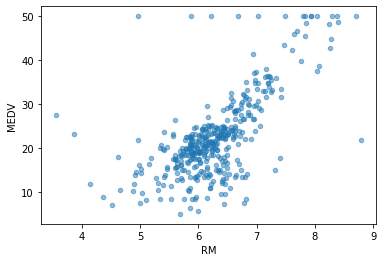

In [19]:
housing_data.plot(kind="scatter", x="RM", y="MEDV",alpha=0.5)

### Trying out data combinations

In [20]:
housing_data['TRM']= housing_data['TAX']/ housing_data['RM']

In [21]:
housing_data.head() #before filling missing values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [22]:
correlation_mat= housing_data.corr()
correlation_mat['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.675573
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TRM       -0.525637
LSTAT     -0.740494
Name: MEDV, dtype: float64

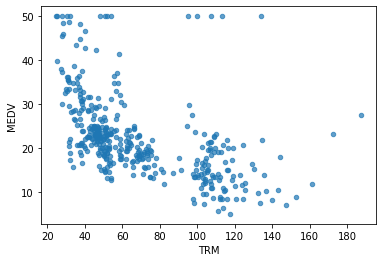

In [23]:
housing_data.plot(kind="scatter", x="TRM", y="MEDV",alpha=0.7)

In [24]:
housing_data=strat_train_set.drop('MEDV', axis=1)
housing_labels=strat_train_set['MEDV'].copy()
housing_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
       ... 
155    15.6
423    13.4
98     43.8
455    14.1
216    23.3
Name: MEDV, Length: 404, dtype: float64

### Missing Attributes

In [25]:
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278745,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.709808,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [26]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(housing_data)

SimpleImputer(strategy='median')

In [27]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [28]:
A=imputer.transform(housing_data)
housing_tr=pd.DataFrame(A, columns=housing_data.columns)

In [29]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278064,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.706310,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.629250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


### Creating a Pipeline

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

In [31]:
housing_tr_num=pipeline.fit_transform(housing_data)
housing_tr_num

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [32]:
housing_tr_num.shape

(404, 13)

### Select and Train the model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=DecisionTreeRegressor()
#model=LinearRegression()
model=RandomForestRegressor()
model.fit(housing_tr_num, housing_labels)

RandomForestRegressor()

In [34]:
some_values=housing_data.iloc[:5]
some_labels=housing_labels.iloc[:5]

In [35]:
prepared_data=pipeline.transform(some_values)

In [36]:
model.predict(prepared_data)

array([22.473, 25.253, 16.355, 23.238, 23.413])

In [37]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

### Evaluating the model

In [38]:
from sklearn.metrics import mean_squared_error
housing_prediction=model.predict(housing_tr_num)
mse= mean_squared_error(housing_labels, housing_prediction)
rmse=np.sqrt(mse)

In [39]:
rmse

1.2849251085777185

In [40]:
### Using better evalution techniques - Cross Validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,housing_tr_num, housing_labels, scoring='neg_mean_squared_error',cv=10)
rmse_score=np.sqrt(-score)

In [41]:
rmse_score

array([2.87161149, 2.78878495, 4.64795754, 2.72794875, 3.147149  ,
       2.98889902, 4.37041913, 3.45068701, 3.18703873, 4.36126806])

In [42]:
def print_score(score):
    print ("Scores:", score)
    print ("Mean:", score.mean())
    print ("Standard Deviation:", score.std())

In [43]:
print_score(rmse_score)

Scores: [2.87161149 2.78878495 4.64795754 2.72794875 3.147149   2.98889902
 4.37041913 3.45068701 3.18703873 4.36126806]
Mean: 3.454176367290087
Standard Deviation: 0.6913094309976999


### Saving the model

In [46]:
from joblib import dump, load
dump(model, 'house_price_pred.joblib')

['house_price_pred.joblib']

### Testing the model

In [48]:
X_test=strat_test_set.drop('MEDV', axis=1)
y_test=strat_test_set['MEDV'].copy()
X_test_prepared=pipeline.transform(X_test)
final_prediction=model.predict(X_test_prepared)
final_mse=mean_squared_error(y_test, final_prediction)
final_rmse=np.sqrt(final_mse)

In [49]:
final_rmse

2.9360490843121467

In [51]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24107722, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

### Using the model

In [55]:
from joblib import load
import numpy as np
model=load("house_price_pred.joblib")
features=np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24107722, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.473])